# Procuring & Reading Geospatial Data

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4

In [2]:
da = xr.open_dataset("2mTemperature.nc")
db = xr.open_dataset("Precipitation.nc")
dc = xr.open_dataset("VSL1.nc")

### Let's first study the Datasets!

In [3]:
da

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 06:08:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
da.isel(latitude=0, longitude=0)

<xarray.Dataset>
Dimensions:    (time: 7)
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 06:08:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
db

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 06:08:02 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
dc

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 06:07:01 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
da.isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 29895159

29895159 entries are missing.

In [10]:
DA = da.interpolate_na()
DA

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan ... 243.09929
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 06:08:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [16]:
DA1 = da.interpolate_na(dim="time")
DA1

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan ... 243.09929
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 06:08:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [17]:
DA1.isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 29895159

### What can we do for the missing data points?
1) Delete keys with missing values  
2) Create a separate model to fill missing values (time consuming). Consider the missing entries for the test dataset and train the model using the values we already have.  
3) Use statistical methods to fill missing values. (mean,median or mode)  

In [13]:
da.t2m.mean(dim='time').plot(figsize=(18,6))

D:\Anaconda\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# Exploring & Visualizing Geospatial Data

Lets find out mean, median and standard deviation for da, db & dc separately.

In [10]:
da.t2m.mean()

<xarray.DataArray 't2m' ()>
array(268.3318, dtype=float32)

In [11]:
da.t2m.median()

<xarray.DataArray 't2m' ()>
array(264.14520264)

In [12]:
da.t2m.std()

<xarray.DataArray 't2m' ()>
array(22.90276718)

We can't infer much for da solely by the mean and median values because they are somewhat closer. Lets try to do it for db and dc.

In [13]:
da.t2m.var()

<xarray.DataArray 't2m' ()>
array(524.53674316)

In [14]:
db.tp.mean()

<xarray.DataArray 'tp' ()>
array(0.00069437, dtype=float32)

In [15]:
dc.swvl1.mean()

<xarray.DataArray 'swvl1' ()>
array(0.26458362, dtype=float32)

In [16]:
db.tp.median()

<xarray.DataArray 'tp' ()>
array(1.04084611e-05)

There is a big difference in mean value and median value of precipation across the globe. This could mean that there are just a handful of regions who lie on the upper end of the data set, who are raising the average of the entire data set.  
Also std is going to be large as well!

In [17]:
db.tp.std()

<xarray.DataArray 'tp' ()>
array(0.00251395)

Yes Standard deviation is large!

In [18]:
dc.swvl1.median()

<xarray.DataArray 'swvl1' ()>
array(0.27055049)

In [19]:
dc.swvl1.std()

<xarray.DataArray 'swvl1' ()>
array(0.1283472)

There is a big difference between median and mean values of swvl as well. This could mean that most of the regions have volumetric soil water level far less than the global average, that's why std is high.
#### Let's visualize with the help of matplotlib

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
da.t2m.mean(dim='latitude')

<xarray.DataArray 't2m' (time: 7, longitude: 3600)>
array([[280.1398 , 280.15674, 280.152  , ..., 280.30505, 280.2535 ,
        280.17407],
       [279.84866, 279.89072, 279.8905 , ..., 279.88336, 279.87906,
        279.84476],
       [279.72125, 279.75345, 279.77167, ..., 279.77368, 279.7622 ,
        279.72302],
       ...,
       [280.2057 , 280.22647, 280.22235, ..., 280.30188, 280.2724 ,
        280.21735],
       [281.01315, 281.00925, 281.0157 , ..., 281.1254 , 281.08826,
        281.03555],
       [281.89914, 281.92694, 281.94742, ..., 281.99536, 281.96664,
        281.9151 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00

We can clearly say that if we keep the latitude as the dimension there isn't much variation among the 7 different days for a particular longitude.  
However, It appears that, going from 0 to 360 degrees along the longitude, the mean values start from a relatively higher value, then reduce till around the middle, and by the end increase again. We can't fully infer this assumption unless we plot the curve.

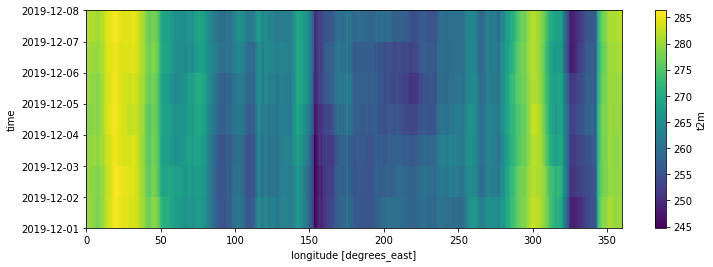

In [36]:
da.t2m.mean(dim='latitude').plot(figsize=(12,4))

So we can see that temperature 2 m above the surface is higher in around 0-50 degress and from 280 to 360.  
Incase we keep longitude as the dimension..

In [23]:
da.t2m.mean(dim='longitude')

D:\Anaconda\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 't2m' (time: 7, latitude: 1801)>
array([[      nan,       nan,       nan, ..., 241.6118 , 241.61752,
        241.68527],
       [      nan,       nan,       nan, ..., 242.421  , 242.42435,
        242.34476],
       [      nan,       nan,       nan, ..., 241.80222, 241.80423,
        241.98877],
       ...,
       [      nan,       nan,       nan, ..., 242.75746, 242.75871,
        242.47241],
       [      nan,       nan,       nan, ..., 245.10968, 245.12021,
        244.79837],
       [      nan,       nan,       nan, ..., 243.48767, 243.489  ,
        243.0993 ]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.9 89.8 89.7 ... -89.7 -89.8 -89.9 -90.0
  * time      (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00

Oops.. some values are missing! 

Anyway, let's try to plot the curve for the values we have got..

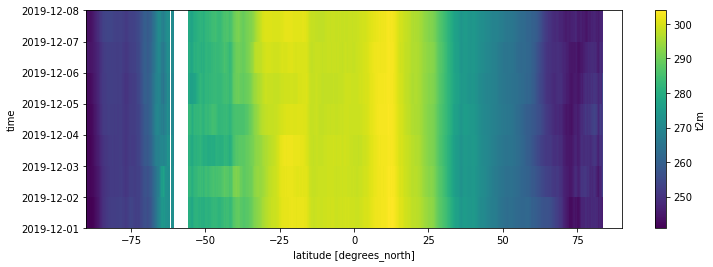

In [24]:
da.t2m.mean(dim='longitude').plot(figsize=(12,4))

There is extreme brightness in the graph around 0 deg latitude which is understandable since it is the equator region which gets direct sunlight.
Let's make a graph for keeping both latitude and longitude as our dimensions. we will get the world map..

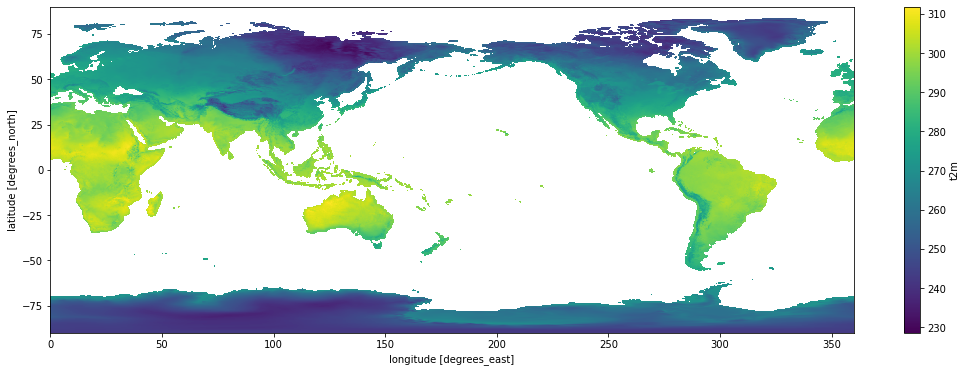

In [25]:
da.t2m.mean(dim='time').plot(figsize=(18,6))

Since the middle portion (around 150 to 250 degress) is mostly landless, and the only terrestrial regions are mostly around the poles so relatively colder areas lie in this region.

In [26]:
da.t2m.mean(dim=['latitude','time'])

<xarray.DataArray 't2m' (longitude: 3600)>
array([280.3785 , 280.40234, 280.40698, ..., 280.47153, 280.44495,
       280.39273], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9

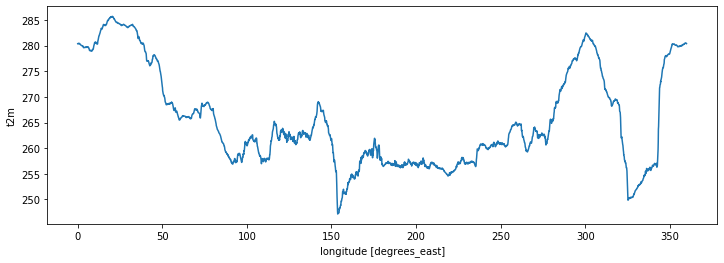

In [27]:
da.t2m.mean(dim=['latitude','time']).plot(figsize=(12,4))

Longitudes which have land areas lying closer to the poles are colder.  
0-50 degrees, 280-320 degrees' areas are hotter as their majority land areas lies near the equator.

Let's try to plot a graph for the standard variation over the seven day period for the world map.  
Atleast we can get to know which of the areas could be most unpredictable or something..

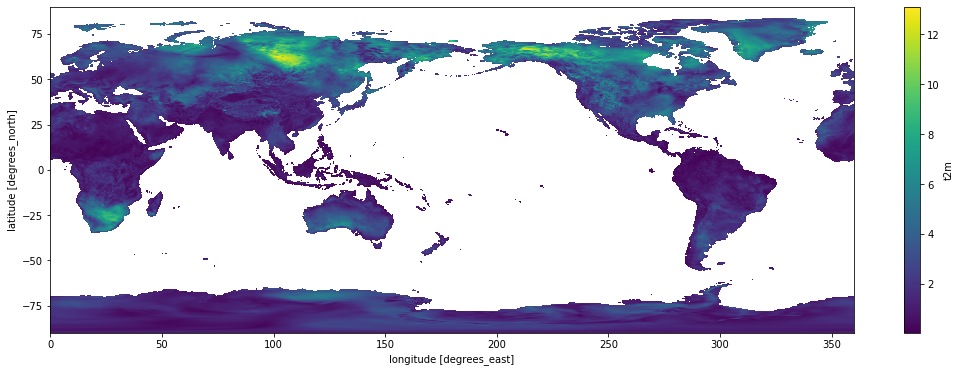

In [28]:
da.t2m.std(dim='time').plot(figsize=(18,6))

As we can see regions around the north pole, Russian Far East, Greenland, Europe, North America (the Canadian Sheild region) have high standard deviation over the values of seven day period..
We will try to find later if we can get some relation between them..

Let's plot the world map for total precipitation..

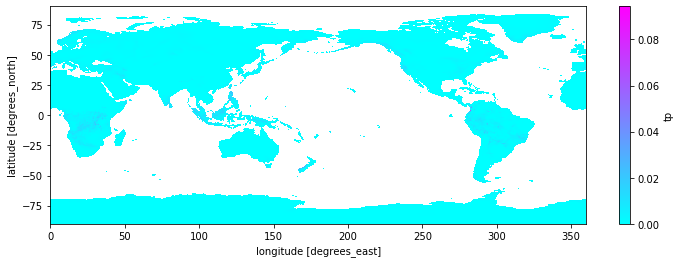

In [29]:
db.tp.mean(dim='time').plot(figsize=(12,4),cmap='cool')

Recall that we noted previously that there are only a handful of regions with much higher rainfall than the world.  
It is evident from the graph that this includes parts of Amazon Rainforest, Indonesia, Congo basin forest and some other small regions will have higher rainfall than the world.

#### Let's have a closer look at Indonesia

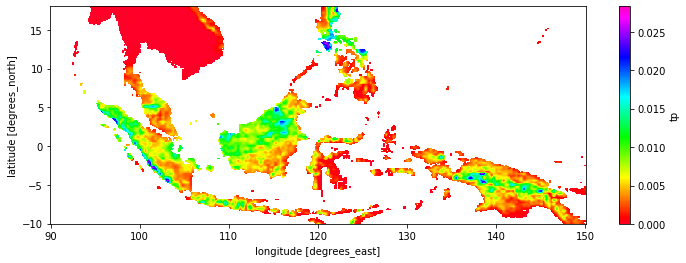

In [30]:
db.sel(latitude=np.linspace(-10,18,290), longitude=np.linspace(90,150,610), method="nearest").tp.mean(dim='time').plot(figsize=(12,4),cmap='gist_rainbow')

We can see more clearly that Indonesia is a high total precipitation region.

similarly let's plot it for soil water volumetric level..

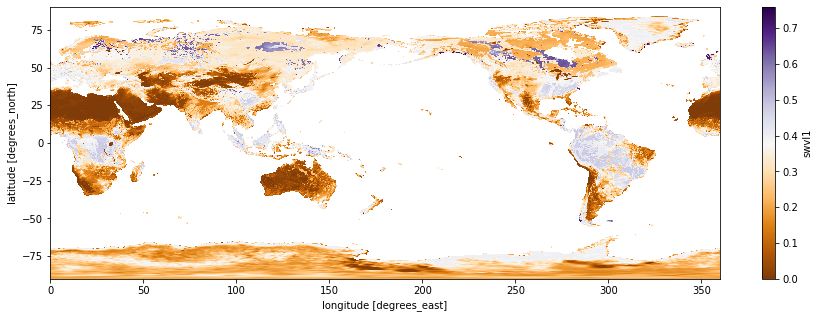

In [31]:
dc.swvl1.mean(dim='time').plot(figsize=(15,5),cmap='PuOr')

### Observations:  
1) Regions of Northern & Western Africa (Sahara Desert), and Saudi Arabia has extremely low swvl, followed by Australia, Antarctica and some parts of Central Asia & China  
2) Regions of Congo Basin, Brazil (Amazon region) and Indonesia (and some parts of south India) have high swvl.. (can this be attributed to these region being High total precipitation areas?)  
3) Some regions of Europe, USA, and Greenland have high or very high SWVL (some parts of Antarctica as well)

#### 1) Lets have a closer look at Sahara Desert & Saudi Arabia region. (15-35deg latitude, 0-60deg longitude)
#### We will view both total precipation graph and soil water volumetric levels, and try to analyse it there is some relation b/w them

Total Precipation in Sahara & Saudi Arabia


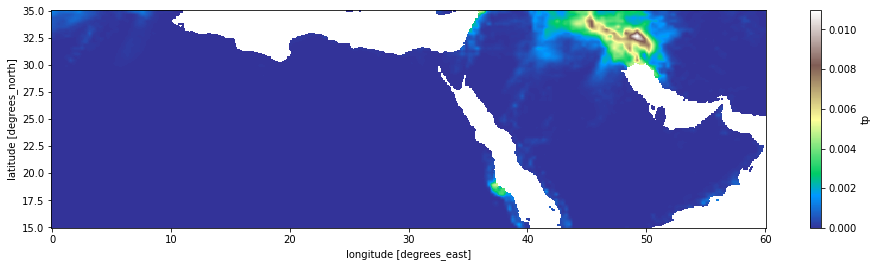

In [32]:
print("Total Precipation in Sahara & Saudi Arabia")
db.sel(latitude=np.linspace(15,35,210),longitude=np.linspace(0,60,610), method="nearest").tp.mean(dim='time').plot(figsize=(16,4),cmap='terrain')

SWVL in Sahara & Saudi Arabia


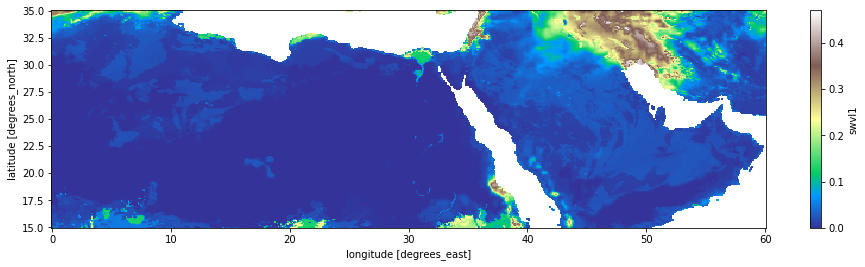

In [33]:
print("SWVL in Sahara & Saudi Arabia")
dc.sel(latitude=np.linspace(15,35,210),longitude=np.linspace(0,60,610), method="nearest").swvl1.mean(dim='time').plot(figsize=(16,4),cmap='terrain')

There could be some relation between the TP and the SWVL levels.  
Lets view the T2m graph.

Temperature 2m above surface in Sahara & Saudi Arabia


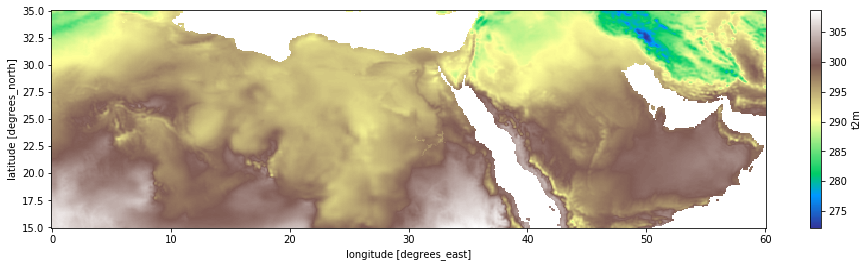

In [34]:
print("Temperature 2m above surface in Sahara & Saudi Arabia")
da.sel(latitude=np.linspace(15,35,210),longitude=np.linspace(0,60,610), method="nearest").t2m.mean(dim='time').plot(figsize=(16,4),cmap='terrain')

#### Let's have a closer look at the 50 to 75 degrees latitude belt..

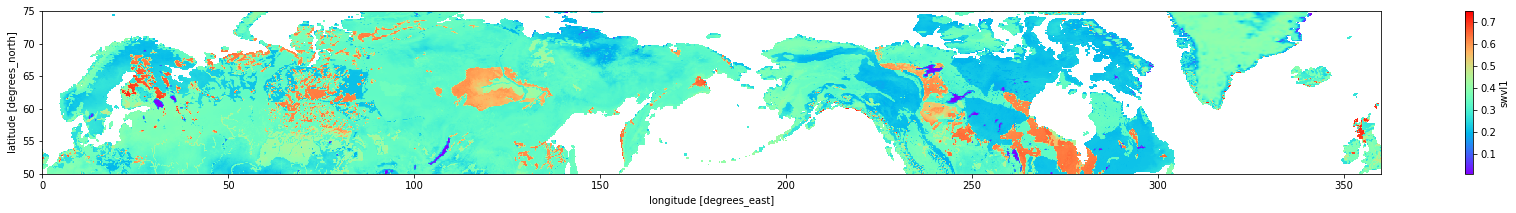

In [35]:
dc.sel(latitude=np.linspace(50,75,260), method="nearest").swvl1.mean(dim='time').plot(figsize=(30,3),cmap='rainbow')

There are various regions those have very high soil water volumetric levels

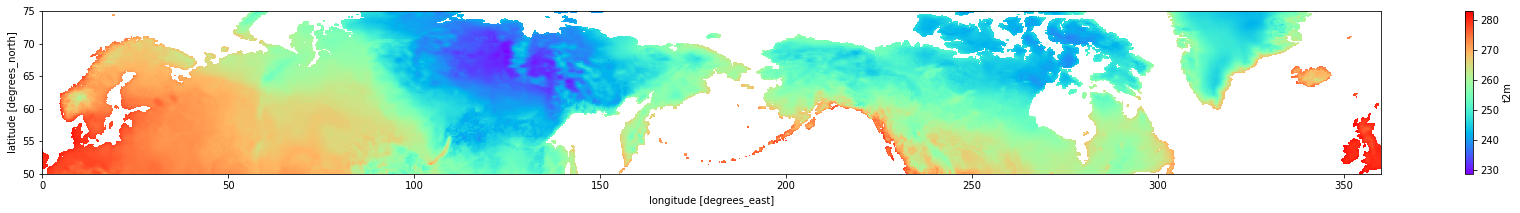

In [36]:
da.sel(latitude=np.linspace(50,75,260), method="nearest").t2m.mean(dim='time').plot(figsize=(30,3),cmap='rainbow')

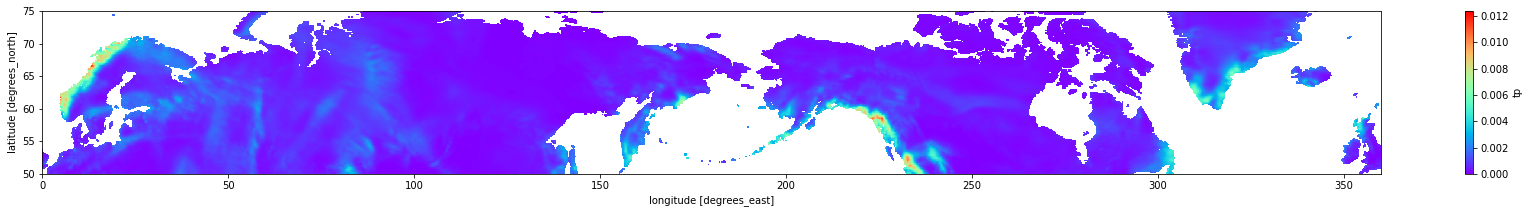

In [37]:
db.sel(latitude=np.linspace(50,75,260), method="nearest").tp.mean(dim='time').plot(figsize=(30,3),cmap='rainbow')

It is somewhat trivial here because all above three graphs do not seem have a significant connection.  
It could be possible that there might be some exception regions in the dataset which do not fit properly with our assumption. Recall that there was a big standard deviation in the t2m temperatures over dec1 to dec7.  
Or it could be that we are still looking at a very big portion of the world map, and we need to dig deeper.  
And the final reason could be these graphs really do not have a relation at all.  
Lets try one more example before we go to next part of our project.  

### Let's view the Amazon Rainforest Region..

-30 to 15 latitude  
280 to 325 longitude

Average Temperature 2m above surface in Amazon Rainforest Region (Dec1 to Dec7)


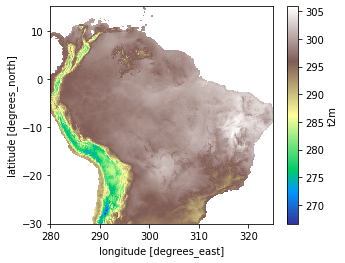

In [38]:
print("Average Temperature 2m above surface in Amazon Rainforest Region (Dec1 to Dec7)")
da.sel(latitude=np.linspace(-30,15,460),longitude=np.linspace(280,325,460), method="nearest").t2m.mean(dim='time').plot(figsize=(5,4),cmap='terrain')

Total Average Precipitation in Amazon Rainforest Region (Dec1 to Dec7)


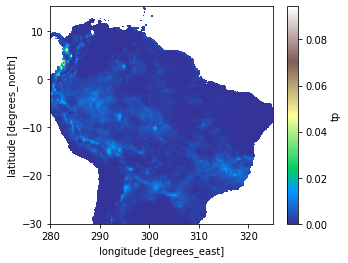

In [39]:
print("Total Average Precipitation in Amazon Rainforest Region (Dec1 to Dec7)")
db.sel(latitude=np.linspace(-30,15,460),longitude=np.linspace(280,325,460), method="nearest").tp.mean(dim='time').plot(figsize=(5,4),cmap='terrain')

Average Soil water volumetric level in Amazon Rainforest Region (Dec1 to Dec7)


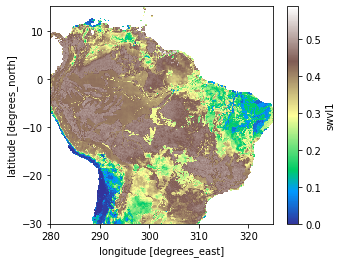

In [40]:
print("Average Soil water volumetric level in Amazon Rainforest Region (Dec1 to Dec7)")
dc.sel(latitude=np.linspace(-30,15,460),longitude=np.linspace(280,325,460), method="nearest").swvl1.mean(dim='time').plot(figsize=(5,4),cmap='terrain')

#### It is most likely that there is some correlation between TP and SWV1

Standard Deviation in Precipitation in Amazon Rainforest Region (Dec1 to Dec7)


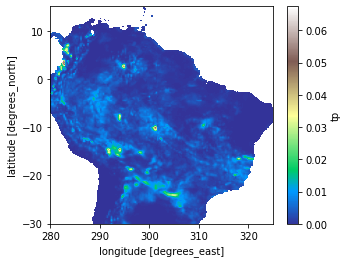

In [41]:
print("Standard Deviation in Precipitation in Amazon Rainforest Region (Dec1 to Dec7)")
db.sel(latitude=np.linspace(-30,15,460),longitude=np.linspace(280,325,460), method="nearest").tp.std(dim='time').plot(figsize=(5,4),cmap='terrain')

STD of Soil water volumetric level in Amazon Rainforest Region (Dec1 to Dec7)


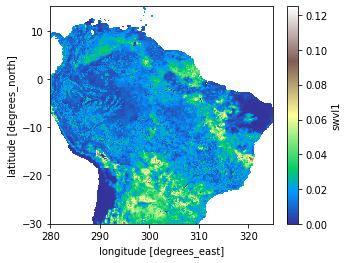

In [42]:
print("STD of Soil water volumetric level in Amazon Rainforest Region (Dec1 to Dec7)")
dc.sel(latitude=np.linspace(-30,15,460),longitude=np.linspace(280,325,460), method="nearest").swvl1.std(dim='time').plot(figsize=(5,4),cmap='terrain')

Most of the regions show little standard deviation in SWV levels.  
Regions with higher total precipation levels show higher standard deviations.

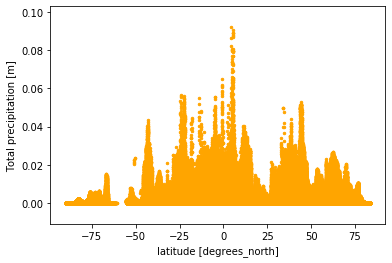

In [47]:
db.sel(time='2019-12-01 12:00:00').plot.scatter(x='latitude',y='tp',figsize = (32,8),color = 'orange',s=6)

# Preprocessing Geo-Spatial Data